# Watertown, MA Rain and Wind analysis

In [1]:
import requests
import os
import numpy as np
import pandas as pd
import getweatherdata
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

%matplotlib inline

In [2]:
#cannot use pd.read_csv because the file is not in the correct format
#use np.genfromtxt instead to read from fixed-width text file
#fields are unicode strings of prescribed length or double

stations = np.genfromtxt(os.getcwd()+'/stationdata.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

In [3]:
#find stations beginning with "Watertown" in Massachusetts
stations[np.logical_and(np.char.find(stations['name'],'WATERTOWN')==0,stations['state']=='MA')]

array([('US1MAMD0119', 42.3711, -71.1995, 16.5, 'MA', 'WATERTOWN 1.1 W', '', '', ''),
       ('US1MAMD0186', 42.3786, -71.1959, 36. , 'MA', 'WATERTOWN 1.1 NW', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

Both stations in Watertown, MA, are not in any of the quality-controlled large networks, so may only have limited data.

In [4]:
response=requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/US1MAMD0119.dly')
with open('WatertownW.dly', 'w') as file:
    file.write(response.text)

In [5]:
getweatherdata.dly_to_csv('WatertownW.dly','WATERTOWNW')

In [6]:
response=requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/US1MAMD0186.dly')
with open('WatertownNW.dly', 'w') as file:
    file.write(response.text)

In [7]:
getweatherdata.dly_to_csv('WatertownNW.dly','WATERTOWNNW')

The following features are of interest for WIND as per the documentation:
* WDF1 = Direction of fastest 1-minute wind (degrees)
* WDF2 = Direction of fastest 2-minute wind (degrees)
* WDF5 = Direction of fastest 5-second wind (degrees)
* WDFG = Direction of peak wind gust (degrees)
* WDFI = Direction of highest instantaneous wind (degrees)
* WDFM = Fastest mile wind direction (degrees)
* WDMV = 24-hour wind movement (km or miles as per user preference, miles on Daily Form pdf file)
* WSF1 = Fastest 1-minute wind speed (miles per hour or meters per second as per user preference)
* WSF2 = Fastest 2-minute wind speed (miles per hour or meters per second as per user preference)
* WSF5 = Fastest 5-second wind speed (miles per hour or meters per second as per user preference)
* WSFG = Peak guest wind speed (miles per hour or meters per second as per user preference)
* WSFI = Highest instantaneous wind speed (miles per hour or meters per second as per user preference)
* WSFM = Fastest mile wind speed (miles per hour or meters per second as per user preference)

In [8]:
df1=pd.read_csv('WATERTOWNW.csv')
df1.head()

,STATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES
0,US1MAMD0119,2018-05-03,0.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N"
1,US1MAMD0119,2018-05-04,13.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N"
2,US1MAMD0119,2018-05-05,3.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N"
3,US1MAMD0119,2018-05-06,0.0,"T,,N",0.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N"
4,US1MAMD0119,2018-05-07,71.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N"


In [9]:
df2=pd.read_csv('WATERTOWNNW.csv')
df2.head()

,STATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,WESF,WESF_ATTRIBUTES
0,US1MAMD0186,2021-03-07,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN
1,US1MAMD0186,2021-03-08,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN
2,US1MAMD0186,2021-03-09,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN
3,US1MAMD0186,2021-03-10,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN
4,US1MAMD0186,2021-03-11,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN


For wind data, find a nearby station that has more data. We try one that is part of the WMO (world meteorological organization).

In [10]:
#find stations beginning with 'BOSTON' in Massachusetts, one (Boston Logan) has a WMO ID
stations[np.logical_and(np.char.find(stations['name'],'BOSTON')==0,stations['state']=='MA')]

array([('US1MASF0001', 42.357 , -71.0671, 13.1, 'MA', 'BOSTON 0.5 WSW', '', '', ''),
       ('US1MASF0031', 42.2927, -71.1456, 54.6, 'MA', 'BOSTON 6.5 SW', '', '', ''),
       ('USC00190768', 42.35  , -71.0667,  5.2, 'MA', 'BOSTON', '', '', ''),
       ('USW00014739', 42.3606, -71.0097,  3.4, 'MA', 'BOSTON', '', '', '72509'),
       ('USW00094701', 42.35  , -71.0667,  6.1, 'MA', 'BOSTON CITY WSO', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [11]:
#find stations beginning with "CAMBRIDGE" in Massachusetts
stations[np.logical_and(np.char.find(stations['name'],'CAMBRIDGE')==0,stations['state']=='MA')]

array([('US1MAMD0011', 42.3876, -71.1253, 14.6, 'MA', 'CAMBRIDGE 0.9 NNW', '', '', ''),
       ('US1MAMD0151', 42.3644, -71.1087,  5.2, 'MA', 'CAMBRIDGE 0.9 SSE', '', '', ''),
       ('USC00191097', 42.3833, -71.1167, 18. , 'MA', 'CAMBRIDGE', '', '', ''),
       ('USC00191099', 42.3833, -71.1   ,  2.4, 'MA', 'CAMBRIDGE "B"', '', '', ''),
       ('USC00191103', 42.375 , -71.1056,  4. , 'MA', 'CAMBRIDGE "C"', '', '', ''),
       ('USC00191110', 42.3667, -71.1   ,  5.8, 'MA', 'CAMBRIDGE MIT', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [12]:
#the Cambridge stations do not have a WMO id, so we will stick with Boston Logan
response=requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00014739.dly')
with open('BostonLogan.dly', 'w') as file:
    file.write(response.text)
getweatherdata.dly_to_csv('BostonLogan.dly','BOSTONLOGAN')
df3=pd.read_csv('BOSTONLOGAN.csv',low_memory=False) #low_memory=False suppresses a warning about mixed data types in columns 
df3.head(50)

,STATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,...,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,USW00014739,1936-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014739,1936-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014739,1936-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014739,1936-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014739,1936-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
5,USW00014739,1936-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
6,USW00014739,1936-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
7,USW00014739,1936-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USW00014739,1936-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN
9,USW00014739,1936-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering Data

Now, filter data for the timeframe of interest (starting January 2022), and trim down the columns to include only precipitation, temperature, and wind data.

In [13]:
#filter data for wind direction and speed, as well as temperature, from Logan station
cols=list(df3.columns.values)
maskw=list(pd.Series(cols).str.match('[W][DS]')) #columns starting WD or WS
maskt=list(pd.Series(cols).str.match('TM'))
cols=[col for i,col in enumerate(cols) if (maskw[i] or maskt[i])]
cols

['TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'WDF1',
 'WDF1_ATTRIBUTES',
 'WDF2',
 'WDF2_ATTRIBUTES',
 'WDF5',
 'WDF5_ATTRIBUTES',
 'WDFG',
 'WDFG_ATTRIBUTES',
 'WDFM',
 'WDFM_ATTRIBUTES',
 'WSF1',
 'WSF1_ATTRIBUTES',
 'WSF2',
 'WSF2_ATTRIBUTES',
 'WSF5',
 'WSF5_ATTRIBUTES',
 'WSFG',
 'WSFG_ATTRIBUTES',
 'WSFM',
 'WSFM_ATTRIBUTES']

In [14]:
#now restrict the columns to cols+identifiers, and restrict the date range
df3=df3[['STATION','DATE']+cols]
df3=df3[df3['DATE']>='2022-01-01']
df3.head(20)

,STATION,DATE,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,...,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES
31412,USW00014739,2022-01-01,111.0,",,W",67.0,",,W",NaN,NaN,120.0,",,W",...,NaN,NaN,36.0,",,W",49.0,",,W",NaN,NaN,NaN,NaN
31413,USW00014739,2022-01-02,78.0,",,W",6.0,",,W",NaN,NaN,310.0,",,W",...,NaN,NaN,103.0,",,W",130.0,",,W",NaN,NaN,NaN,NaN
31414,USW00014739,2022-01-03,6.0,",,W",-60.0,",,W",NaN,NaN,20.0,",,W",...,NaN,NaN,89.0,",,W",121.0,",,W",NaN,NaN,NaN,NaN
31415,USW00014739,2022-01-04,-5.0,",,W",-82.0,",,W",NaN,NaN,310.0,",,W",...,NaN,NaN,76.0,",,W",98.0,",,W",NaN,NaN,NaN,NaN
31416,USW00014739,2022-01-05,106.0,",,W",-27.0,",,W",NaN,NaN,180.0,",,W",...,NaN,NaN,107.0,",,W",161.0,",,W",NaN,NaN,NaN,NaN
31417,USW00014739,2022-01-06,61.0,",,W",0.0,",,W",NaN,NaN,290.0,",,W",...,NaN,NaN,98.0,",,W",125.0,",,W",NaN,NaN,NaN,NaN
31418,USW00014739,2022-01-07,6.0,",,W",-49.0,",,W",NaN,NaN,280.0,",,W",...,NaN,NaN,103.0,",,W",130.0,",,W",NaN,NaN,NaN,NaN
31419,USW00014739,2022-01-08,-21.0,",,W",-82.0,",,W",NaN,NaN,310.0,",,W",...,NaN,NaN,103.0,",,W",134.0,",,W",NaN,NaN,NaN,NaN
31420,USW00014739,2022-01-09,61.0,",,W",-60.0,",,W",NaN,NaN,230.0,",,W",...,NaN,NaN,143.0,",,W",197.0,",,W",NaN,NaN,NaN,NaN
31421,USW00014739,2022-01-10,44.0,",,W",-55.0,",,W",NaN,NaN,280.0,",,W",...,NaN,NaN,112.0,",,W",161.0,",,W",NaN,NaN,NaN,NaN


In [15]:
#keep only TMIN, TMAX (in tenths of degrees Celsius, NOT Fahrenheit), 
#WDF2 and WSF2 (direction and speed of fastest 2-min wind)
df3=df3[['STATION','DATE','TMIN','TMAX','WDF2','WSF2']]
df3.head(50)

,STATION,DATE,TMIN,TMAX,WDF2,WSF2
31412,USW00014739,2022-01-01,67.0,111.0,120.0,36.0
31413,USW00014739,2022-01-02,6.0,78.0,310.0,103.0
31414,USW00014739,2022-01-03,-60.0,6.0,20.0,89.0
31415,USW00014739,2022-01-04,-82.0,-5.0,310.0,76.0
31416,USW00014739,2022-01-05,-27.0,106.0,180.0,107.0
31417,USW00014739,2022-01-06,0.0,61.0,290.0,98.0
31418,USW00014739,2022-01-07,-49.0,6.0,280.0,103.0
31419,USW00014739,2022-01-08,-82.0,-21.0,310.0,103.0
31420,USW00014739,2022-01-09,-60.0,61.0,230.0,143.0
31421,USW00014739,2022-01-10,-55.0,44.0,280.0,112.0


In [16]:
#date restrict df1 and df2, and restrict the columns to station, date, precipitation, and snow
df1=df1[df1['DATE']>='2022-01-01']
df1=df1[['STATION','DATE','PRCP','SNOW']]
df2=df2[df2['DATE']>='2022-01-01']
df2=df2[['STATION','DATE','PRCP','SNOW']]

In [17]:
df1.head(20) #precipitation is given in tenths of mm

,STATION,DATE,PRCP,SNOW
1328,US1MAMD0119,2022-01-01,5.0,0.0
1329,US1MAMD0119,2022-01-02,76.0,0.0
1330,US1MAMD0119,2022-01-03,8.0,0.0
1331,US1MAMD0119,2022-01-04,0.0,0.0
1332,US1MAMD0119,2022-01-05,0.0,0.0
1333,US1MAMD0119,2022-01-06,76.0,0.0
1334,US1MAMD0119,2022-01-07,79.0,170.0
1335,US1MAMD0119,2022-01-08,51.0,43.0
1336,US1MAMD0119,2022-01-09,0.0,0.0
1337,US1MAMD0119,2022-01-10,3.0,NaN


In [18]:
df2.head(20) #we see here that missing dates can occur (Jan 5, 2022 is missing), so need to take care of mapping dates correctly

,STATION,DATE,PRCP,SNOW
270,US1MAMD0186,2022-01-01,3.0,NaN
271,US1MAMD0186,2022-01-02,81.0,NaN
272,US1MAMD0186,2022-01-03,5.0,NaN
273,US1MAMD0186,2022-01-04,0.0,0.0
274,US1MAMD0186,2022-01-06,71.0,NaN
275,US1MAMD0186,2022-01-07,81.0,175.0
276,US1MAMD0186,2022-01-08,0.0,0.0
277,US1MAMD0186,2022-01-09,0.0,0.0
278,US1MAMD0186,2022-01-10,5.0,NaN
279,US1MAMD0186,2022-01-11,0.0,NaN


## Plotting Data

### Quick plots

Plot temperature, precipitation, highlight special wind events (wind coming from ENE to ESE).

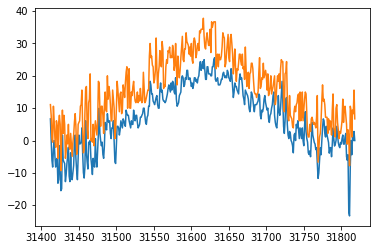

In [19]:
#first quick plot of the temperature ... only important to gauge snowfall vs rain
plt.plot(df3['TMIN']/10)
plt.plot(df3['TMAX']/10)

<BarContainer object of 405 artists>

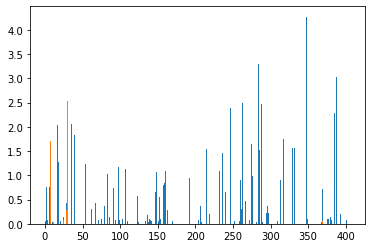

In [20]:
#first quick plot of precipitation/rain and snow in cm
days=np.arange(1,len(df1)+1)
plt.bar(days,df1['PRCP']/100)
plt.bar(days,df1['SNOW']/100)

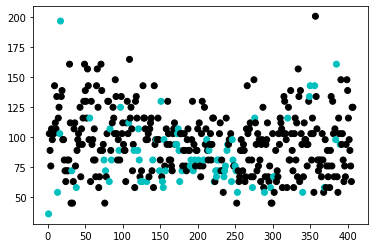

In [21]:
#first quick plot of wind speed, highlighting wind coming from ENE to ESE directions (60 to 120 degrees from true North)
days=np.arange(1,len(df3)+1)
col=np.where((df3['WDF2']>=60) & (df3['WDF2']<=120),'c','k')
plt.scatter(days,df3['WSF2'],c=col)

### Detailed plots with annotations

In [22]:
#renaming data frames for ease of use (NOT a copy, point to same address)
Watertown1=df1
Watertown2=df2
BostonLogan=df3

In [23]:
#indexing by date
Watertown1.index=pd.DatetimeIndex(Watertown1.DATE)
Watertown2.index=pd.DatetimeIndex(Watertown2.DATE)
BostonLogan.index=pd.DatetimeIndex(BostonLogan.DATE)

In [24]:
#reindex, filling in missing dates, so that all dataframes have the same index (NOW we have new objects with np.NaN filled)
today=pd.to_datetime('today').date()
Watertown1=Watertown1.reindex(pd.date_range("2022-01-01", today))
Watertown2=Watertown2.reindex(pd.date_range("2022-01-01", today))
BostonLogan=BostonLogan.reindex(pd.date_range("2022-01-01", today))

In [25]:
Watertown2.head(20)

,STATION,DATE,PRCP,SNOW
2022-01-01,US1MAMD0186,2022-01-01,3.0,NaN
2022-01-02,US1MAMD0186,2022-01-02,81.0,NaN
2022-01-03,US1MAMD0186,2022-01-03,5.0,NaN
2022-01-04,US1MAMD0186,2022-01-04,0.0,0.0
2022-01-05,NaN,NaN,NaN,NaN
2022-01-06,US1MAMD0186,2022-01-06,71.0,NaN
2022-01-07,US1MAMD0186,2022-01-07,81.0,175.0
2022-01-08,US1MAMD0186,2022-01-08,0.0,0.0
2022-01-09,US1MAMD0186,2022-01-09,0.0,0.0
2022-01-10,US1MAMD0186,2022-01-10,5.0,NaN


In [26]:
BostonLogan.tail(20) #there appears to be a several day lag in publishing the latest data

,STATION,DATE,TMIN,TMAX,WDF2,WSF2
2023-01-27,USW00014739,2023-01-27,-11.0,56.0,280.0,94.0
2023-01-28,USW00014739,2023-01-28,-11.0,100.0,250.0,103.0
2023-01-29,USW00014739,2023-01-29,11.0,106.0,210.0,81.0
2023-01-30,USW00014739,2023-01-30,22.0,78.0,250.0,63.0
2023-01-31,USW00014739,2023-01-31,-50.0,50.0,360.0,76.0
2023-02-01,USW00014739,2023-02-01,-61.0,-11.0,290.0,67.0
2023-02-02,USW00014739,2023-02-02,-44.0,33.0,220.0,94.0
2023-02-03,USW00014739,2023-02-03,-222.0,6.0,310.0,148.0
2023-02-04,USW00014739,2023-02-04,-233.0,-78.0,290.0,139.0
2023-02-05,USW00014739,2023-02-05,-78.0,106.0,220.0,116.0


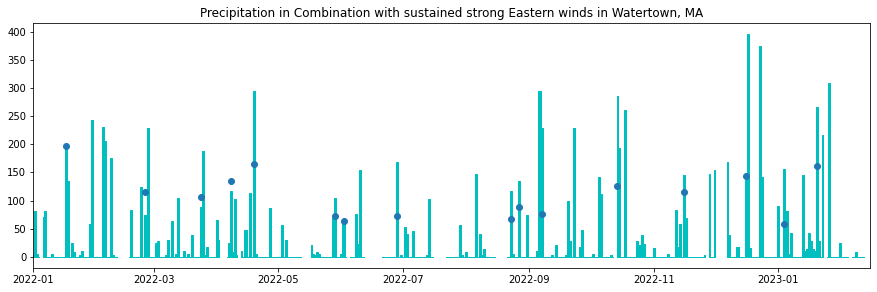

In [40]:
plt.figure(figsize=(15,4.5))
threshw=40 #wind threshold
threshr=50 #rain threshold
dirmin=60
dirmax=140
mask=(BostonLogan['WDF2']>=dirmin) & (BostonLogan['WDF2']<=dirmax) & (BostonLogan['WSF2']>=threshw) & (Watertown2['PRCP']>=threshr)
col=np.where(mask,'r','c')
plt.fill_between(Watertown2.index,0,Watertown2['PRCP'],step='mid',color=col)
plt.scatter(BostonLogan.loc[mask].index,BostonLogan.loc[mask]['WSF2'])
plt.axis(xmin='2022-01-01', xmax=today)
plt.title(f'Precipitation in Combination with sustained strong Eastern winds in Watertown, MA');

In [41]:
BostonLogan.loc[mask], Watertown1.loc[mask], Watertown2.loc[mask]

(                STATION        DATE   TMIN   TMAX   WDF2   WSF2
 2022-01-17  USW00014739  2022-01-17   17.0   94.0  100.0  197.0
 2022-02-25  USW00014739  2022-02-25  -77.0    6.0   80.0  116.0
 2022-03-24  USW00014739  2022-03-24   39.0   61.0  110.0  107.0
 2022-04-08  USW00014739  2022-04-08   67.0  172.0  130.0  134.0
 2022-04-19  USW00014739  2022-04-19   61.0  150.0  130.0  165.0
 2022-05-29  USW00014739  2022-05-29  150.0  228.0  110.0   72.0
 2022-06-02  USW00014739  2022-06-02  122.0  172.0   70.0   63.0
 2022-06-28  USW00014739  2022-06-28  167.0  244.0  110.0   72.0
 2022-08-23  USW00014739  2022-08-23  200.0  239.0  110.0   67.0
 2022-08-27  USW00014739  2022-08-27  194.0  256.0   90.0   89.0
 2022-09-07  USW00014739  2022-09-07  156.0  222.0   80.0   76.0
 2022-10-14  USW00014739  2022-10-14  139.0  206.0  130.0  125.0
 2022-11-16  USW00014739  2022-11-16   28.0  139.0  100.0  116.0
 2022-12-16  USW00014739  2022-12-16   56.0   72.0   70.0  143.0
 2023-01-04  USW00014739 

In [38]:
Watertown1.loc['2022-12-23']

STATION    US1MAMD0119
DATE        2022-12-23
PRCP               396
SNOW                 0
Name: 2022-12-23 00:00:00, dtype: object

In [39]:
BostonLogan.loc['2022-12-23']

STATION    USW00014739
DATE        2022-12-23
TMIN               -72
TMAX               139
WDF2               230
WSF2               201
Name: 2022-12-23 00:00:00, dtype: object